Backtest Setup

In [91]:
import pandas as pd
import numpy as np
import matplotlib as plt
import yfinance as yf

In [92]:
tickers = [
    'BLK',  'AAPL',  'AMZN',  'NVDA',  'GOOGL',
    'ACN',  'CAT',   'LIN',   'UPS',   'UNH',
    'AXP',  'CVS',   'MET',   'NKE',   'IBM'
]
start, end = '2025-01-01','2025-03-31'

In [93]:
prices = yf.download(tickers, start=start, end=end,auto_adjust=False)['Adj Close']
prices.head()

[*********************100%***********************]  15 of 15 completed


Ticker,AAPL,ACN,AMZN,AXP,BLK,CAT,CVS,GOOGL,IBM,LIN,MET,NKE,NVDA,UNH,UPS
Date,,,,,,,,,,,,,,,
2025-01-02,243.582199,348.820007,220.220001,296.744843,1011.876404,356.738220,43.665062,189.212082,218.484421,412.793030,81.258652,73.299004,138.297272,502.363068,122.122055
2025-01-03,243.092728,353.850006,224.190002,302.077148,1015.287781,360.724365,45.195610,191.569366,221.176483,412.125244,81.685905,72.940819,144.456711,510.816956,122.043182
2025-01-06,244.730927,351.329987,227.610001,300.881134,1007.241699,361.130890,45.244980,196.643524,221.196350,411.537201,81.467308,71.637421,149.416245,511.484070,122.457253
2025-01-07,241.944000,356.390015,222.110001,301.020660,975.435303,359.941010,45.205482,195.265121,222.477814,413.570435,81.616356,71.726959,140.127106,512.061646,123.216393
2025-01-08,242.433441,357.730011,222.130005,301.847931,980.746277,358.027283,45.432594,193.726883,221.702972,418.613617,82.292023,70.930992,140.097122,522.287964,124.971268


In [94]:
momentum = prices/prices.shift(21) - 1
print(momentum)

Ticker          AAPL       ACN      AMZN       AXP       BLK       CAT  \
Date                                                                     
2025-01-02       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-03       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-06       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-07       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-08       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-10       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-13       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-14       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-15       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-16       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-17       NaN       NaN       NaN       NaN       NaN       NaN   
2025-01-21       NaN       NaN       N

In [95]:
from scipy.stats import zscore
momentum_z = momentum.apply(zscore, axis=1)
momentum_z.iloc[-10:].round(2)

Ticker,AAPL,ACN,AMZN,AXP,BLK,CAT,CVS,GOOGL,IBM,LIN,MET,NKE,NVDA,UNH,UPS
Date,,,,,,,,,,,,,,,
2025-03-17,-0.85,-1.61,-1.40,-1.25,0.63,0.42,0.96,-0.88,0.53,0.92,0.86,1.08,-0.88,0.03,1.44
2025-03-18,-0.88,-1.33,-1.23,-1.21,0.72,0.24,1.21,-0.89,0.13,1.01,0.85,0.98,-1.38,0.41,1.36
2025-03-19,-0.88,-1.53,-1.14,-1.11,0.68,0.26,1.45,-0.69,0.30,0.77,1.02,0.10,-1.44,1.05,1.18
2025-03-20,-0.76,-2.17,-0.95,-0.76,0.59,0.32,1.43,-0.68,-0.12,0.88,0.91,0.15,-1.07,1.03,1.20
2025-03-21,-0.62,-1.99,-0.73,-0.58,0.53,0.45,1.45,-0.59,-0.14,0.94,0.94,-0.67,-1.31,1.49,0.82
2025-03-24,-0.98,-1.77,-0.41,-0.38,0.39,0.53,1.38,-0.47,-0.25,0.55,1.02,-1.17,-0.91,2.06,0.40
2025-03-25,-0.86,-1.64,-0.01,-0.32,0.81,0.59,1.19,-0.21,-0.19,0.45,0.86,-1.85,-0.57,2.05,-0.30
2025-03-26,-0.84,-1.37,-0.19,-0.25,0.77,0.50,1.30,-0.23,0.16,0.42,0.84,-2.03,-0.82,1.99,-0.26
2025-03-27,-0.34,-1.25,-0.24,-0.51,0.80,0.42,1.29,-0.23,0.06,0.67,0.62,-1.85,-1.41,2.05,-0.11


In [108]:
n=len(tickers)
quintile = int(n*0.2)
def weights(row):
    ranked = row.sort_values(ascending=False)
    long=ranked.index[:quintile]
    short=ranked.index[-quintile:]
    w = pd.Series(0,index=row.index)
    w[long] = 1/quintile
    w[short] = -1/quintile
    return w
weights_df = momentum_z.apply(weights,axis=1)
print(weights_df[-10:])

Ticker          AAPL       ACN      AMZN       AXP       BLK  CAT       CVS  \
Date                                                                          
2025-03-17  0.000000 -0.333333 -0.333333 -0.333333  0.000000  0.0  0.333333   
2025-03-18  0.000000 -0.333333 -0.333333  0.000000  0.000000  0.0  0.333333   
2025-03-19  0.000000 -0.333333 -0.333333  0.000000  0.000000  0.0  0.333333   
2025-03-20  0.000000 -0.333333 -0.333333  0.000000  0.000000  0.0  0.333333   
2025-03-21  0.000000 -0.333333 -0.333333  0.000000  0.000000  0.0  0.333333   
2025-03-24 -0.333333 -0.333333  0.000000  0.000000  0.000000  0.0  0.333333   
2025-03-25 -0.333333 -0.333333  0.000000  0.000000  0.000000  0.0  0.333333   
2025-03-26 -0.333333 -0.333333  0.000000  0.000000  0.000000  0.0  0.333333   
2025-03-27  0.000000 -0.333333  0.000000  0.000000  0.333333  0.0  0.333333   
2025-03-28  0.000000 -0.333333  0.000000 -0.333333  0.333333  0.0  0.333333   

Ticker      GOOGL  IBM       LIN       MET       NK

In [120]:
returns = prices.pct_change().dropna()
port_rets = (weights_df.shift()*returns).sum(axis=1)
print(port_rets[-10:])

Date
2025-03-17    0.016210
2025-03-18    0.013840
2025-03-19   -0.014064
2025-03-20    0.029903
2025-03-21   -0.014166
2025-03-24   -0.021602
2025-03-25   -0.011323
2025-03-26    0.012339
2025-03-27   -0.004133
2025-03-28    0.013191
dtype: float64


<Axes: title={'center': 'Hi'}, xlabel='Date'>

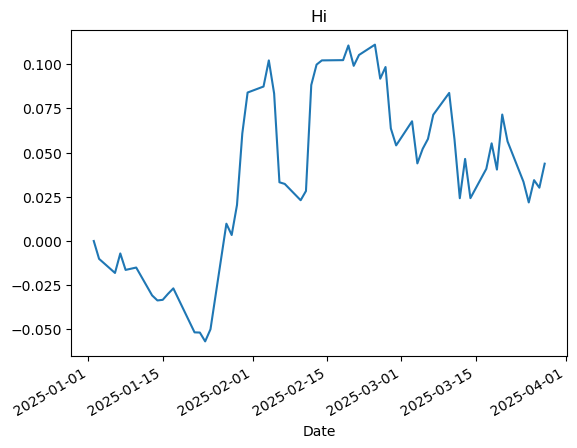

In [126]:
cum_rets = (1+port_rets).cumprod()-1
cum_rets.plot(title="Hi")

Sharpe: 0.7440475872122471


<Axes: title={'center': 'Drawdown'}, xlabel='Date'>

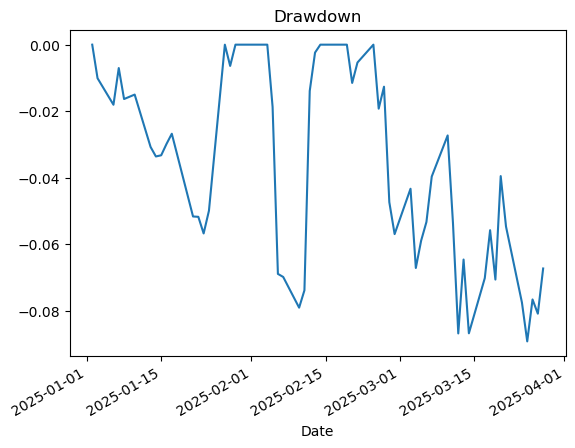

In [136]:
sharpe = port_rets.mean()/port_rets.std()*np.sqrt(252)
rolling_max = cum_rets.cummax()
drawdown = (cum_rets - rolling_max)
drawdown.min()
print("Sharpe: " + str (sharpe))
drawdown.plot(title="Drawdown")